In [96]:
#import package
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from datetime import timedelta

Import and pre-clean the data

In [45]:
test_result = pd.read_csv('test_results.csv')
user = pd.read_csv('user_table.csv')
data = pd.merge(left = user, right = test_result, how= 'left',on = 'user_id')
data['revenue'] = data['price']*data['converted']
data.head()

,user_id,city,country,lat,long,timestamp,source,device,operative_system,test,price,converted,revenue
0,510335,Peabody,USA,42.53,-70.97,2015-05-02 12:06:41,ads-google,mobile,android,0,39,0,0
1,89568,Reno,USA,39.54,-119.82,2015-04-30 16:02:01,ads_facebook,mobile,android,1,59,0,0
2,434134,Rialto,USA,34.11,-117.39,2015-05-16 19:53:40,direct_traffic,web,windows,1,59,0,0
3,289769,Carson City,USA,39.15,-119.74,2015-04-23 18:50:58,ads_facebook,web,windows,0,39,0,0
4,939586,Chicago,USA,41.84,-87.68,2015-03-08 13:53:10,ads_facebook,mobile,iOS,1,59,0,0


In [46]:
data.describe()

,user_id,lat,long,test,price,converted,revenue
count,275616.000000,275616.000000,275616.000000,275616.000000,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772,0.359878,46.201324,0.018210,0.821581
std,288533.458944,5.209627,18.086486,0.479965,9.600403,0.133711,6.159435
min,3.000000,19.700000,-157.800000,0.000000,39.000000,0.000000,0.000000
25%,249544.500000,33.660000,-112.200000,0.000000,39.000000,0.000000,0.000000
50%,498861.000000,37.740000,-88.930000,0.000000,39.000000,0.000000,0.000000
75%,748856.500000,40.700000,-78.910000,1.000000,59.000000,0.000000,0.000000
max,999999.000000,61.180000,30.310000,1.000000,59.000000,1.000000,59.000000


In [47]:
data.isnull().sum()

user_id             0
city                0
country             0
lat                 0
long                0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
revenue             0
dtype: int64

### Should the company sell its software for 39 or 59 dollars? 
We could perform a hypothesis test in this case. However, we need to conform several assumption. The ads fee is stable regardless of the list price. Furthermore, any other up front cost remains the same for different list prices. 

In [15]:
low_price = data[data['price'] == 39]
high_price = data[data['price'] == 59]

In [16]:
low_price.head()

,user_id,city,country,lat,long,timestamp,source,device,operative_system,test,price,converted
0,510335,Peabody,USA,42.53,-70.97,2015-05-02 12:06:41,ads-google,mobile,android,0,39,0
3,289769,Carson City,USA,39.15,-119.74,2015-04-23 18:50:58,ads_facebook,web,windows,0,39,0
7,270353,New York,USA,40.67,-73.94,2015-04-17 10:41:12,ads_other,mobile,iOS,0,39,0
11,636500,Charlotte,USA,35.20,-80.83,2015-03-08 22:52:38,direct_traffic,mobile,iOS,0,39,0
12,272473,Chicago,USA,41.84,-87.68,2015-05-26 08:60:25,ads_facebook,web,mac,0,39,0


In [20]:
print("The Conversion rate of low price is ",round(len(low_price[low_price['converted']==1])*100/len(low_price),2),"%")

The Conversion rate of low price is  1.98 %


In [21]:
print("The Conversion rate of low price is ",round(len(high_price[high_price['converted']==1])*100/len(high_price),2),"%")

The Conversion rate of low price is  1.55 %


The low price has a slightly higher conversion rate than the high price, however, is the conversion rate significance? We need to run a statistical test to find out

In [30]:
count = np.array([len(low_price[low_price['converted']==1]),len(high_price[high_price['converted']==1])])
nobs = np.array([len(low_price),len(high_price)])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.8f}'.format(pval))

0.00000000


The result indicates that the conversion rate is significance different between low price and high price. 
What about the revenue? 

In [41]:
low_val = data[data['test'] == 0]['revenue'].values
high_val = data[data['test'] == 1]['revenue'].values

In [53]:
#Variance Test
stat, p = f_oneway(low_val, high_val)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=31.999, p=0.000


In [54]:
#Two sample t test for mean
print(ttest_ind(low_val, high_val, axis=0, equal_var=True))

Ttest_indResult(statistic=-5.6567411081117145, pvalue=1.5442639241230396e-08)


Result shows the revenue is significance difference with each other. In this case, higher price could drive much more revenue even by considering having a low conversion rate. Therefore, I would recommend to use the higher price. 

### What are your main findings looking at the data?

In [55]:
data.head()

,user_id,city,country,lat,long,timestamp,source,device,operative_system,test,price,converted,revenue
0,510335,Peabody,USA,42.53,-70.97,2015-05-02 12:06:41,ads-google,mobile,android,0,39,0,0
1,89568,Reno,USA,39.54,-119.82,2015-04-30 16:02:01,ads_facebook,mobile,android,1,59,0,0
2,434134,Rialto,USA,34.11,-117.39,2015-05-16 19:53:40,direct_traffic,web,windows,1,59,0,0
3,289769,Carson City,USA,39.15,-119.74,2015-04-23 18:50:58,ads_facebook,web,windows,0,39,0,0
4,939586,Chicago,USA,41.84,-87.68,2015-03-08 13:53:10,ads_facebook,mobile,iOS,1,59,0,0


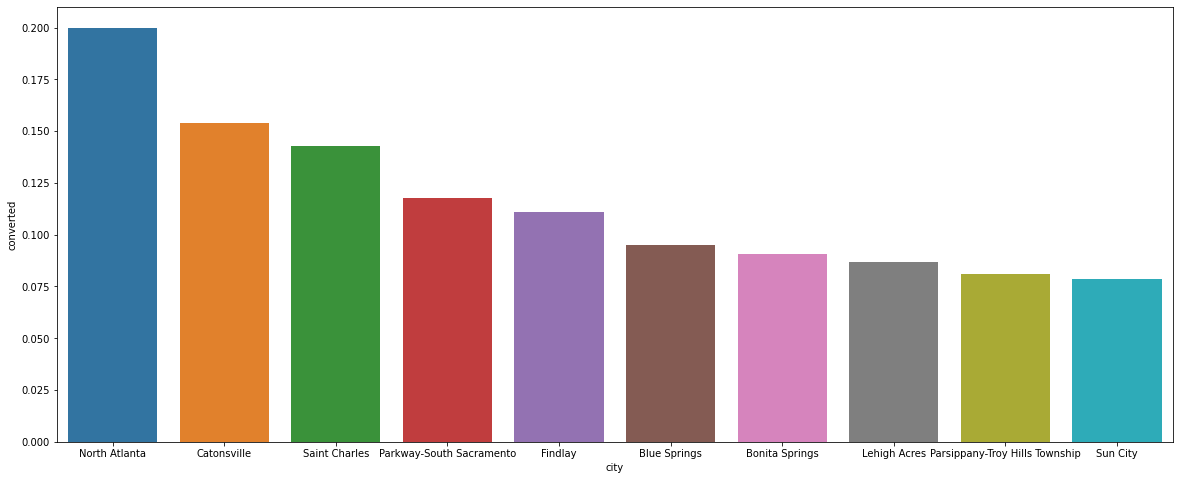

In [80]:
graph1 = data[['city','converted']].groupby('city').mean().reset_index().sort_values(by='converted',ascending = False)
plt.figure(figsize=(20,8))
graph1_plot = sns.barplot(x='city',y='converted',data=graph1[:10])
plt.show(graph1_plot)

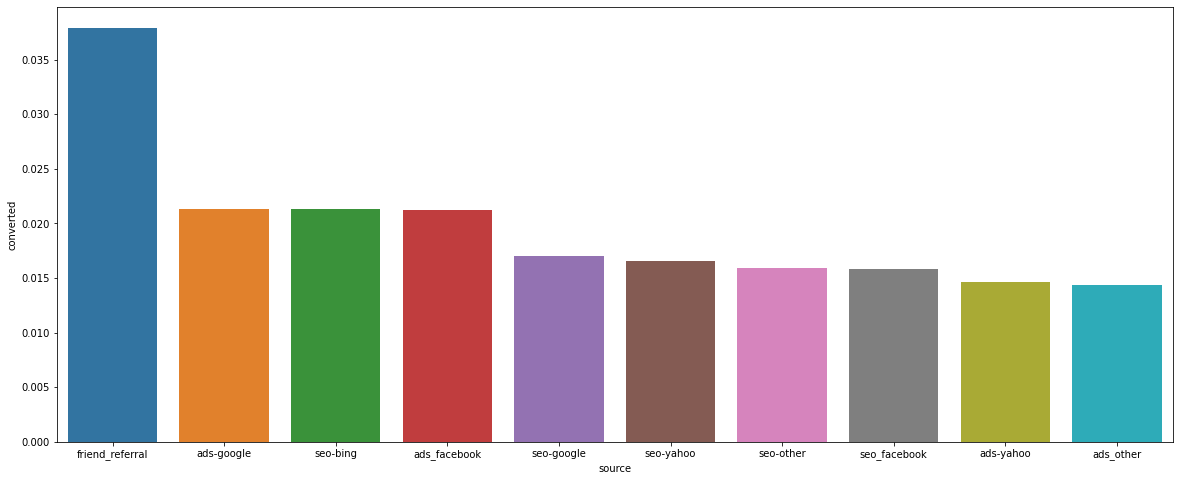

In [81]:
graph2 = data[['source','converted']].groupby('source').mean().reset_index().sort_values(by='converted',ascending = False)
plt.figure(figsize=(20,8))
graph2_plot = sns.barplot(x='source',y='converted',data=graph2[:10])
plt.show(graph2_plot)

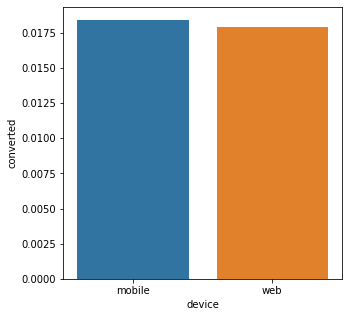

In [83]:
graph3 = data[['device','converted']].groupby('device').mean().reset_index().sort_values(by='converted',ascending = False)
plt.figure(figsize=(5,5))
graph3_plot = sns.barplot(x='device',y='converted',data=graph3)
plt.show(graph3_plot)

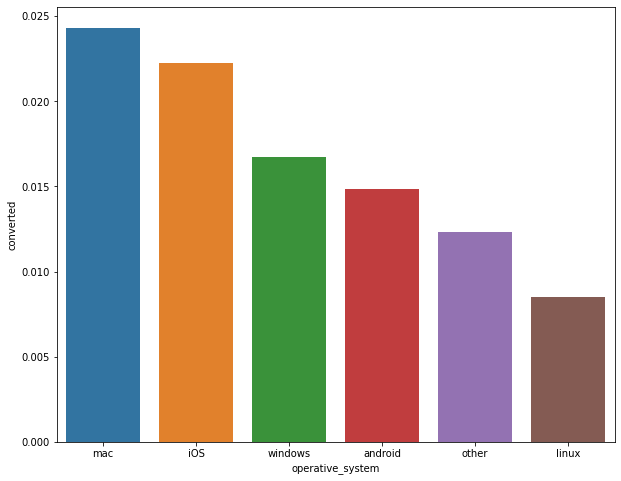

In [88]:
graph4 = data[['operative_system','converted']].groupby('operative_system').mean().reset_index().sort_values(by='converted',ascending = False)
plt.figure(figsize=(10,8))
graph4_plot = sns.barplot(x='operative_system',y='converted',data=graph4[:10])
plt.show(graph4_plot)

### After how many days you would have stopped the test?

In [93]:
pd.to_datetime(max(data['timestamp'])) - pd.to_datetime(min(data['timestamp']))

Timedelta('90 days 23:55:33')

Based on the A/B Test size calculator, with 1.98% baseline conversion rate, 0.2% minimum detectable effect, 80% statistical power, and 5% significance level, we need 77k users per variation. 

In [113]:
one_week = str(pd.to_datetime(min(data['timestamp'])) + timedelta(days=7))
print("It has ",len(data[data['timestamp']<one_week])," users each week")

It has  21490  users each week


In [115]:
77000/len(data[data['timestamp']<one_week])

3.583061889250814

Based on the result, it only needs 4 weeks at most to drive conculsion on the result. Therefore, instead of running 12 weeks, we could only run 4 weeks. 